In [169]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import keras as ks
from keras.preprocessing.image import load_img,img_to_array,image, ImageDataGenerator,array_to_img
from keras.models import Sequential
from keras.layers import Dropout,Dense, Activation,Flatten
import tensorflow as tf
plt.rcParams['figure.figsize'] = [14, 10]

<class 'numpy.ndarray'>
(300, 250, 3)


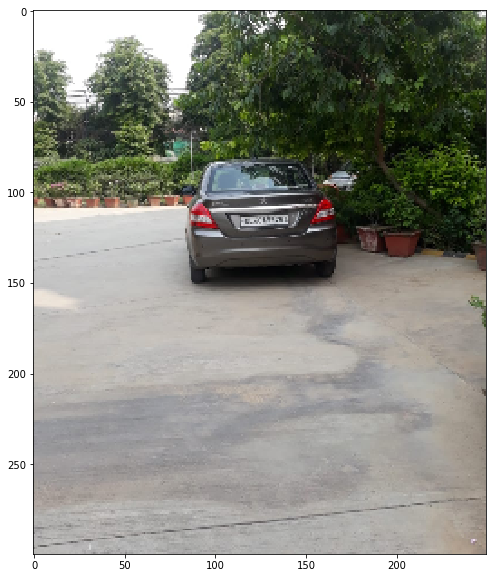

In [174]:
imag = cv2.imread("images/IMG-20190708-WA0001.jpg")
imag = cv2.cvtColor(imag,cv2.COLOR_BGR2RGB)
imag = cv2.resize(imag,(250,300))
plt.imshow(imag)
print(type(imag))
print(imag.shape)

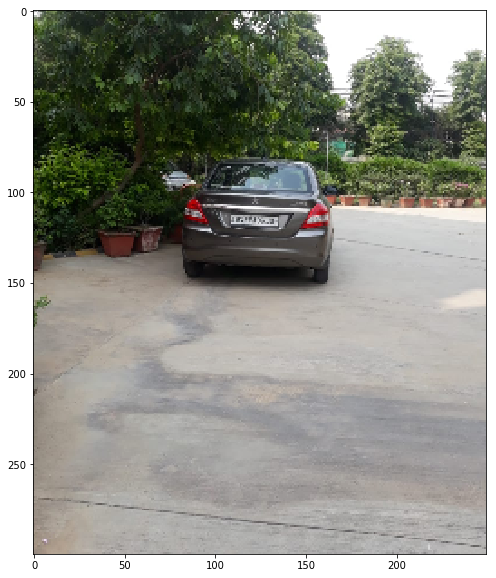

In [176]:
flip_1 = np.fliplr(imag)
plt.imshow(flip_1)

In [178]:
#Transpose of an image
x = tf.Variable(imag, name='x')

model = tf.global_variables_initializer()

In [179]:
x = tf.transpose(x, perm=[1, 0, 2])
session = tf.Session()
session.run(model)
result = session.run(x)

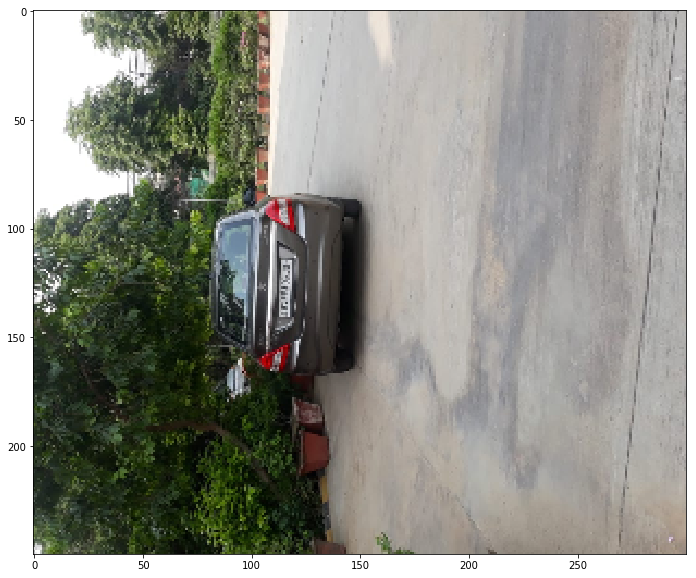

In [180]:
plt.imshow(result)

In [183]:
x = tf.reverse_sequence(x, [300]*250, 1, batch_dim=0)
session.run(model)
res = session.run(y)

TypeError: Fetch argument array([[[[130.16327 , 133.2347  ,  92.71428 ],
         [161.77042 , 174.35715 , 120.70918 ],
         [170.04591 , 178.03061 , 118.80612 ],
         ...,
         [196.17857 , 210.25    , 125.70918 ],
         [137.9847  , 164.9847  ,  35.27041 ],
         [139.41325 , 155.84183 , 107.05612 ]],

        [[147.5102  , 155.5102  , 108.51021 ],
         [ 64.908165,  62.035717,  43.607143],
         [131.86734 , 146.86734 , 104.67347 ],
         ...,
         [182.06123 , 198.41837 , 158.34694 ],
         [166.65306 , 182.32143 , 107.51021 ],
         [107.081635, 122.65306 ,  74.21429 ]],

        [[153.41327 , 161.41327 , 114.41327 ],
         [106.668365, 108.668365,  69.59694 ],
         [165.9949  , 177.9949  , 129.9949  ],
         ...,
         [ 92.811226,  97.015305,  69.86735 ],
         [121.04082 , 127.04082 ,  90.948975],
         [127.061226, 143.04593 ,  96.61735 ]],

        ...,

        [[158.35204 , 150.35204 , 139.35204 ],
         [176.2449  , 168.2449  , 155.2449  ],
         [171.09694 , 163.09694 , 152.09694 ],
         ...,
         [175.21428 , 162.21428 , 156.21428 ],
         [172.11734 , 159.11734 , 150.11734 ],
         [181.2857  , 170.64285 , 160.85715 ]],

        [[182.35715 , 174.35715 , 161.35715 ],
         [172.26021 , 164.26021 , 151.26021 ],
         [179.73979 , 173.73979 , 159.73979 ],
         ...,
         [168.18877 , 154.5204  , 150.52551 ],
         [179.2347  , 166.2347  , 158.2347  ],
         [169.29591 , 158.65306 , 148.86736 ]],

        [[168.55103 , 160.55103 , 149.55103 ],
         [177.85205 , 169.85205 , 156.85205 ],
         [165.61224 , 159.18367 , 146.96938 ],
         ...,
         [184.75511 , 174.11224 , 165.2551  ],
         [182.0204  , 172.0204  , 162.0204  ],
         [178.53061 , 166.57654 , 151.32654 ]]]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

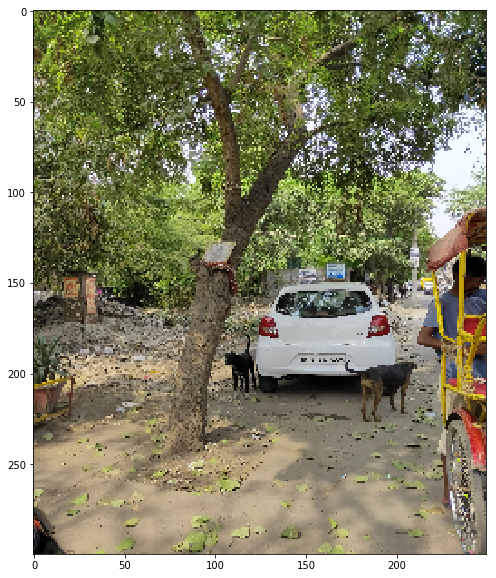

In [184]:
plt.imshow(res)

In [140]:
datagen = ImageDataGenerator?

In [185]:
datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [150]:
#plt.imshow(imag)

In [186]:
x = imag.reshape((1,)+imag.shape)

In [187]:
x.shape

(1, 300, 250, 3)

In [188]:
print(x)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [219 219 219]
   [171 173 174]
   [187 188 191]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [206 205 209]
   [253 253 251]
   [238 238 238]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [226 226 228]
   [254 255 253]
   [251 252 252]]

  ...

  [[186 185 183]
   [187 186 184]
   [182 181 179]
   ...
   [157 140 130]
   [153 140 126]
   [160 146 133]]

  [[186 185 183]
   [183 182 180]
   [185 184 182]
   ...
   [154 140 129]
   [152 139 130]
   [151 138 129]]

  [[181 180 178]
   [181 180 178]
   [183 182 180]
   ...
   [154 140 129]
   [150 137 128]
   [149 136 127]]]]


In [189]:
i = 0
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='car', save_format='jpeg'):
    i += 1
    #plt.imshow()
    i+=1
    if i>=5:
        break
    

In [168]:
for j in os.listdir("images/"):
    img = load_img("images/"+j)
    dat = img_to_array(img)
    dat = cv2.resize(dat,(224,224))
    y = dat.reshape((1,)+dat.shape)
    i= 0
    for batch in datagen.flow(y, batch_size=1,save_to_dir='preview', save_prefix='car', save_format='jpeg'):
        i += 1
        i+=1
        if i>10:
            break

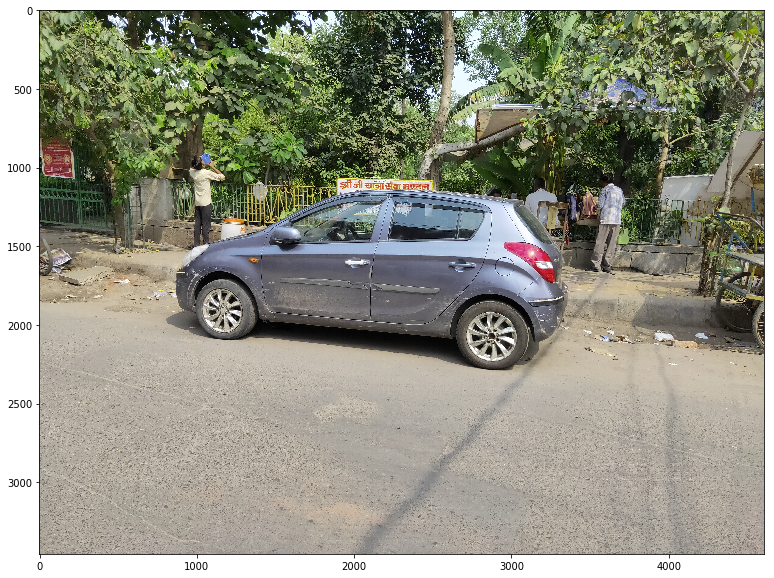

In [167]:
plt.imshow(img)